# Project Title: Retail Store Performance and Customer Behaviour Analysis for Zudio

In [1]:
import pandas as pd
import mysql.connector as msc
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [2]:
conn = msc.connect(host = "127.0.0.1",
                  username = "root",
                  password = "Vinay@2002",
                  database = "Zudio_database")

cur = conn.cursor()

query = "select * from zudio;"

cur.execute(query)
data = cur.fetchall()

zudio = pd.DataFrame(data, columns = ["Store", "Country", "State", "City", "Category", "Clothing_Type", "Store_Number", "Postal_Code", "Store_Type", "Store_Open_Date", "Selling_Area_Size_(sq ft)", "Store_Manager", "Manager_ID", "Store_Address", "Operating_Hours", "Staff_Count", "Parking_Availability", "Security_Features", "Order_ID", "Order_Date", "Month", "Customer_ID", "Customer_Name", "Product_ID", "Price", "Quantity", "Sales_Profit","Operating_Hours_AM", "Operating_Hours_PM"])

In [3]:
zudio.head()

,Store,Country,State,City,Category,Clothing_Type,Store_Number,Postal_Code,Store_Type,Store_Open_Date,...,Order_Date,Month,Customer_ID,Customer_Name,Product_ID,Price,Quantity,Sales_Profit,Operating_Hours_AM,Operating_Hours_PM
0,Zudio,India,Karnataka,Jalna,Women,Dresses,30,411084,Owned,2004-06-22,...,2006-11-24,November,233084,Michele Ochoa,354,1958,5,3916.0,10:00:00,19:00:00
1,Zudio,India,Gujarat,Patna,Kids,Skirts,48,404562,Owned,2019-12-20,...,2017-06-24,June,926472,Daniel Jimenez,741,2078,1,831.2,10:00:00,21:00:00
2,Zudio,India,Uttar Pradesh,Kolkata,Men,Hoodies,97,437773,Rented,2004-09-23,...,2017-08-24,August,853255,Steven Davis,607,1445,2,1156.0,10:00:00,21:00:00
3,Zudio,India,West Bengal,Kolkata,Women,Dresses,93,431725,Owned,2011-04-24,...,2027-03-24,March,106146,Derek Orozco,991,2469,6,5925.6,11:00:00,20:00:00
4,Zudio,India,West Bengal,Guwahati,Men,Dresses,51,415370,Owned,2029-05-22,...,2008-04-24,April,264070,Victor Arnold,479,1105,6,2652.0,10:00:00,19:00:00


In [4]:
dfz = zudio

In [5]:
# Changing Datatype
dfz["Store_Open_Date"] = dfz["Store_Open_Date"].astype("datetime64[ns]")
dfz["Order_Date"] = dfz["Order_Date"].astype("datetime64[ns]")
dfz["Operating_Hours_AM"] = pd.to_datetime(dfz["Operating_Hours_AM"], errors = "coerce").dt.time
dfz["Operating_Hours_PM"] = pd.to_datetime(dfz["Operating_Hours_PM"], errors = "coerce").dt.time

In [6]:
dfz.isnull().sum()

Store                        0
Country                      0
State                        0
City                         0
Category                     0
Clothing_Type                0
Store_Number                 0
Postal_Code                  0
Store_Type                   0
Store_Open_Date              0
Selling_Area_Size_(sq ft)    0
Store_Manager                0
Manager_ID                   0
Store_Address                0
Operating_Hours              0
Staff_Count                  0
Parking_Availability         0
Security_Features            0
Order_ID                     0
Order_Date                   0
Month                        0
Customer_ID                  0
Customer_Name                0
Product_ID                   0
Price                        0
Quantity                     0
Sales_Profit                 0
Operating_Hours_AM           0
Operating_Hours_PM           0
dtype: int64

In [7]:
dfz.dtypes

Store                                object
Country                              object
State                                object
City                                 object
Category                             object
Clothing_Type                        object
Store_Number                          int64
Postal_Code                           int64
Store_Type                           object
Store_Open_Date              datetime64[ns]
Selling_Area_Size_(sq ft)             int64
Store_Manager                        object
Manager_ID                           object
Store_Address                        object
Operating_Hours                      object
Staff_Count                           int64
Parking_Availability                 object
Security_Features                    object
Order_ID                              int64
Order_Date                   datetime64[ns]
Month                                object
Customer_ID                           int64
Customer_Name                   

**• Store Level Analysis**

**1. Which store locations (city/state/country) generate the highest revenue?**

In [8]:
dfz["Revenue"] = dfz["Price"] * dfz["Quantity"]

In [9]:
store_loc = zudio.groupby("City").agg({"Revenue":"sum"}).sort_values(by = "Revenue", ascending = False).reset_index()
store_loc = store_loc.head(10)

In [10]:
store_loc

,City,Revenue
0,Jalna,1719676
1,Mysuru,1703579
2,Jammu,1664596
3,Kolkata,1645961
4,Bhopal,1645597
5,Hyderabad,1642797
6,Coimbatore,1629608
7,Agra,1603054
8,Visakhapatnam,1594813
9,Indore,1590816


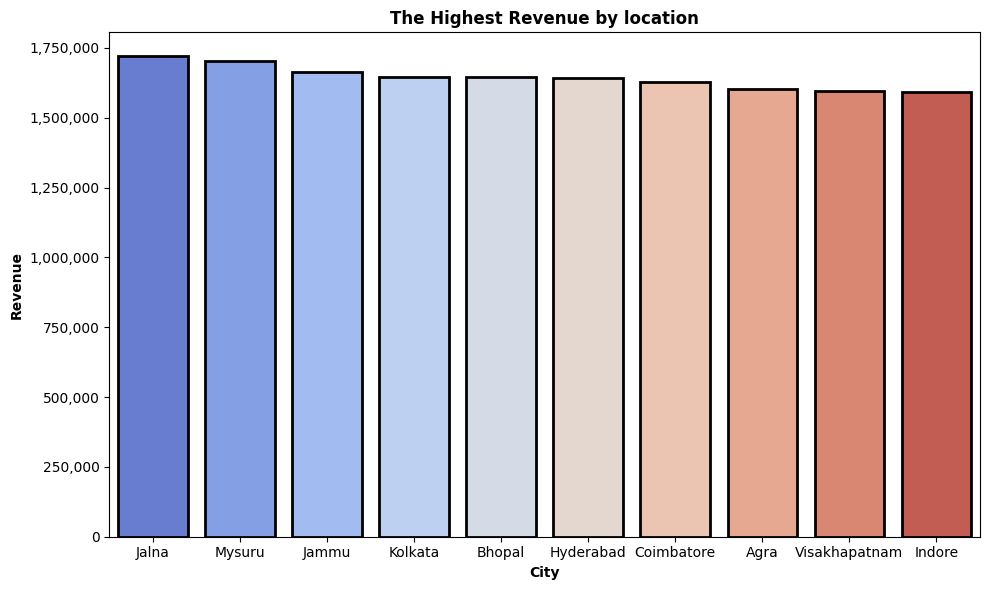

In [45]:
plt.figure(figsize = (10,6))
plt.style.use('default')
sns.barplot(data = store_loc, x = "City", y = "Revenue", palette = "coolwarm", edgecolor = "k", linewidth = 2)
plt.title("The Highest Revenue by location", fontsize = 12, fontweight = "bold")
plt.xlabel("City", fontsize = 10, fontweight = "bold")
plt.ylabel("Revenue", fontsize = 10, fontweight = "bold")
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

plt.savefig("The Highest Revenue by location.png", dpi = 300, bbox_inches = "tight")
plt.tight_layout()
plt.show()

**2. How does store size (selling_area_size) impact total revenue?**

In [12]:
dfz.shape

(7899, 30)

In [13]:
pd.set_option("display.max_columns",30)

In [14]:
correlation = dfz["Selling_Area_Size_(sq ft)"].corr(dfz["Revenue"])
print(correlation)


-0.016925305267708777


In [15]:
store_size = dfz.groupby("Selling_Area_Size_(sq ft)")["Revenue"].mean().reset_index()
store_size.round(2)

,Selling_Area_Size_(sq ft),Revenue
0,800,8042.30
1,950,8126.89
2,1000,8046.72
3,1100,7860.61
4,1200,7687.62
5,1300,7798.45
6,1400,7931.69


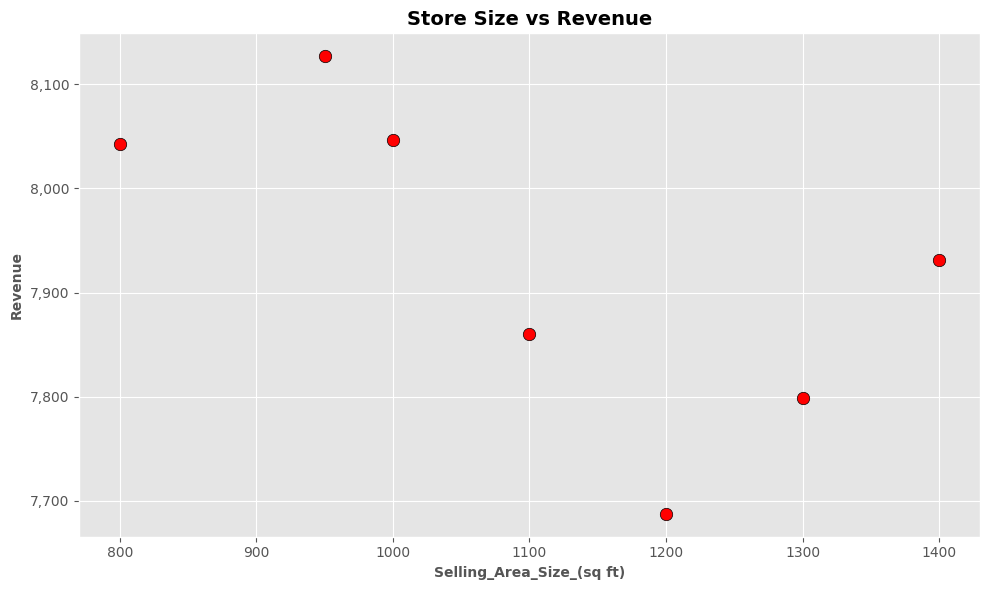

In [16]:
plt.figure(figsize = (10,6))
plt.style.use('ggplot')
plt.scatter(store_size["Selling_Area_Size_(sq ft)"], store_size["Revenue"], s = 80, ec = "k", color = "r")
plt.title("Store Size vs Revenue", fontsize = 14, fontweight = "bold")
plt.xlabel("Selling_Area_Size_(sq ft)", fontsize = 10, fontweight = "bold")
plt.ylabel("Revenue", fontsize = 10, fontweight = "bold")

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

**3. Is there a relationship between staff count and store performance?**

In [17]:
relation = dfz["Staff_Count"].corr(dfz["Sales_Profit"])
print("Correlation:",relation)

Correlation: -0.0029817025315890876


   Staff_Count  Sales_Profit
0            3       3177.11
1            4       3270.67
2            5       3136.52
3            6       3075.50
4            7       3127.88


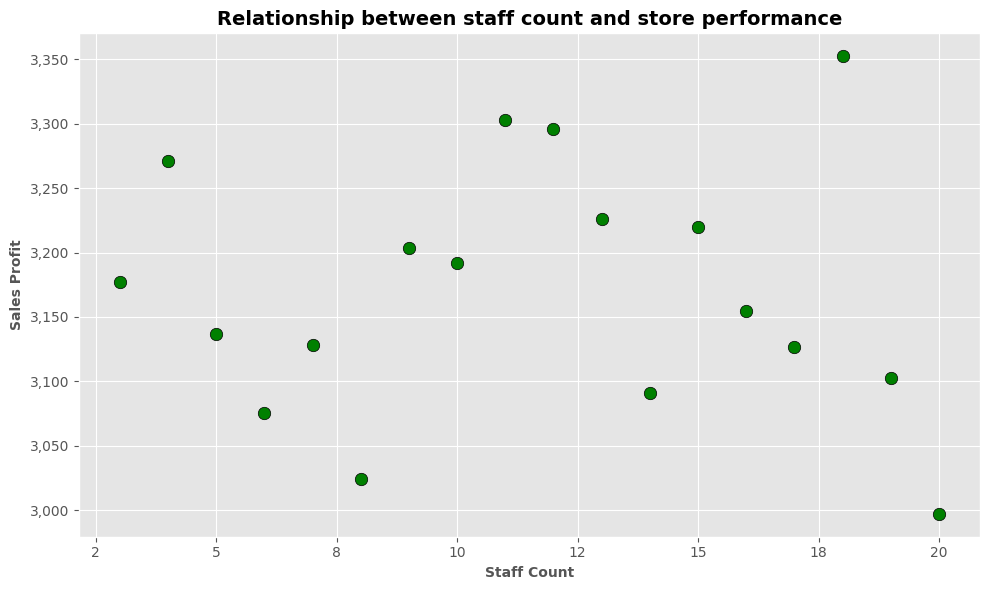

In [18]:
staff = dfz.groupby("Staff_Count")["Sales_Profit"].mean().reset_index()
print(staff.round(2).head())


#Visualize
plt.figure(figsize = (10,6))
plt.style.use("ggplot")

plt.scatter(staff["Staff_Count"], staff["Sales_Profit"], s = 80, ec = "k", color = "g")
plt.title("Relationship between staff count and store performance", fontsize = 14, fontweight = "bold")
plt.xlabel("Staff Count", fontsize = 10, fontweight = "bold")
plt.ylabel("Sales Profit", fontsize = 10, fontweight = "bold")

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

In [19]:
dfz["Staff_Count"].unique()

array([17,  6, 18, 13, 19, 14,  5,  8,  9, 11,  3,  4, 15, 10, 20,  7, 12,
       16])

In [20]:
dfz["Staff_Count"].nunique()

18

**4. Do owned stores perform better than rented ones in terms of revenue?**

In [21]:
store_perform = dfz.groupby("Store_Type").agg({"Revenue":"mean"}).sort_values(by = "Revenue", ascending = False).reset_index()
store_perform.round(2)

,Store_Type,Revenue
0,Owned,7945.36
1,Rented,7908.23


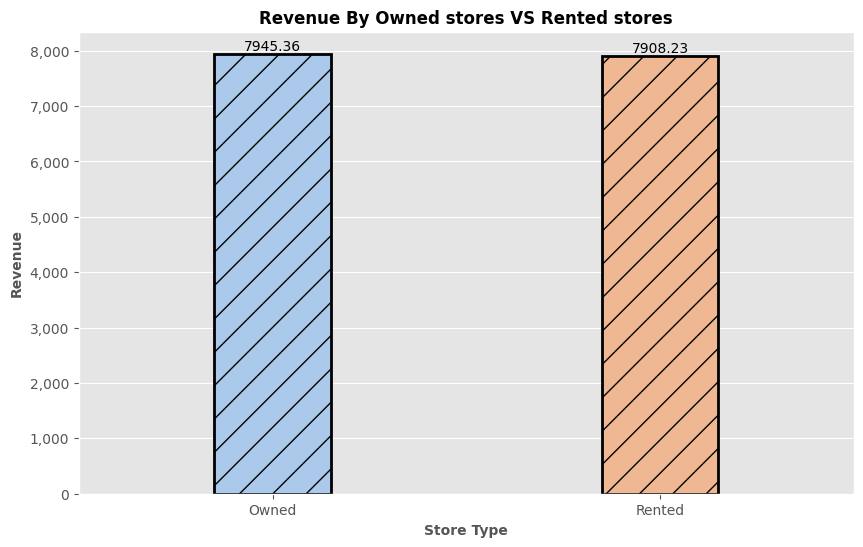

In [22]:
plt.figure(figsize = (10,6))
plt.style.use('ggplot')
rank = sns.barplot(data = store_perform, x = "Store_Type", y = "Revenue", width = 0.3 , edgecolor = "k", linewidth = 2, palette = 'pastel', hatch = "/")
plt.title("Revenue By Owned stores VS Rented stores", fontsize = 12, fontweight = "bold")
plt.xlabel("Store Type", fontsize = 10, fontweight = "bold")
plt.ylabel("Revenue", fontsize = 10, fontweight = "bold")

for bar in rank.containers:
    rank.bar_label(bar)

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

**5. How does parking availability affect the number of orders?**

In [23]:
parking = dfz.groupby("Parking_Availability")["Quantity"].count().reset_index()
parking = parking.rename(columns = {"Quantity":"Number_of_orders"})

In [24]:
parking

,Parking_Availability,Number_of_orders
0,Available,3933
1,Not Available,3966


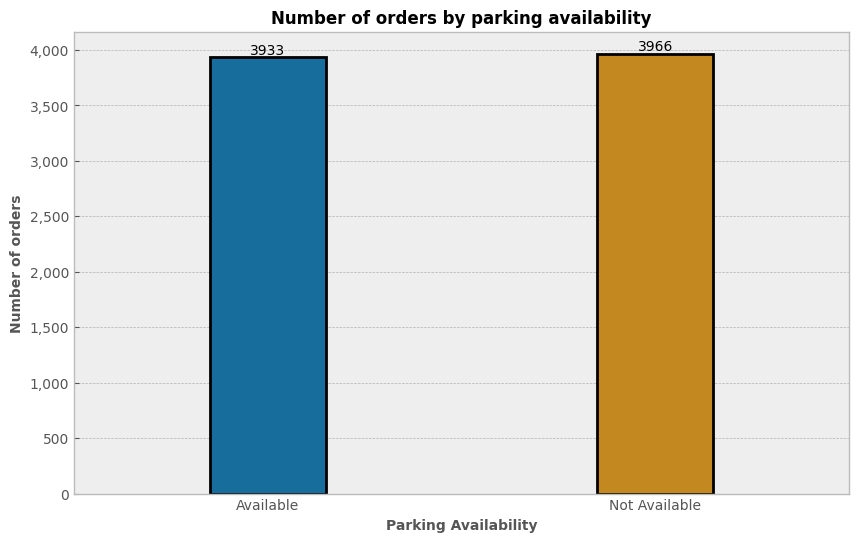

In [25]:
plt.figure(figsize = (10,6))
plt.style.use('bmh')
rank = sns.barplot(data = parking, x = "Parking_Availability", y = "Number_of_orders", width = 0.3 ,edgecolor = "k", linewidth = 2, palette = 'colorblind')
plt.title("Number of orders by parking availability", fontsize = 12, fontweight = "bold")
plt.xlabel("Parking Availability", fontsize = 10, fontweight = "bold")
plt.ylabel("Number of orders", fontsize = 10, fontweight = "bold")

for bar in rank.containers:
    rank.bar_label(bar)

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

**6. Does the age of the store (based on store_open_date) influence sales?**

In [26]:
dfz["Store_Age_years"] = (pd.to_datetime(dfz["Store_Open_Date"].max()) - (pd.to_datetime(dfz["Store_Open_Date"]))).dt.days/365

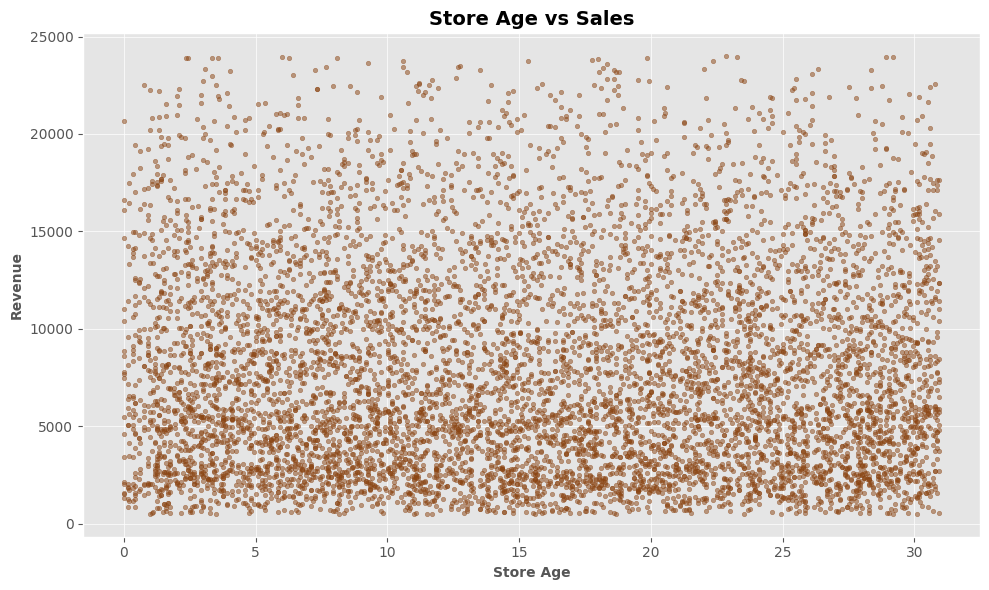

In [49]:
plt.figure(figsize = (10,6))
plt.style.use('ggplot')


plt.scatter(dfz["Store_Age_years"], dfz["Revenue"], s=10, alpha=0.5, color="saddlebrown")

plt.title("Store Age vs Sales", fontsize = 14, fontweight = "bold")
plt.xlabel("Store Age", fontsize = 10, fontweight = "bold")
plt.ylabel("Revenue", fontsize = 10, fontweight = "bold")

plt.savefig("Store Age vs Sales",dpi = 300, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

**7. Which store managers are associated with the highest performing stores?**

In [28]:
manager = dfz.groupby(["Manager_ID","Store_Manager"]).agg({"Revenue":"mean"}).sort_values(by = "Revenue", ascending = False).reset_index()
manager.head(10)

,Manager_ID,Store_Manager,Revenue
0,M31,Jason Gates,23992.0
1,M13,Jessica Bailey,23976.0
2,M40,Richard Mendez,23960.0
3,M14,Jonathan Allen,23952.0
4,M95,Joseph Barajas,23936.0
5,M88,Lauren Benjamin,23920.0
6,M66,David May,23920.0
7,M13,James Bautista,23920.0
8,M75,Daniel Brown,23912.0
9,M37,Lori Porter,23912.0


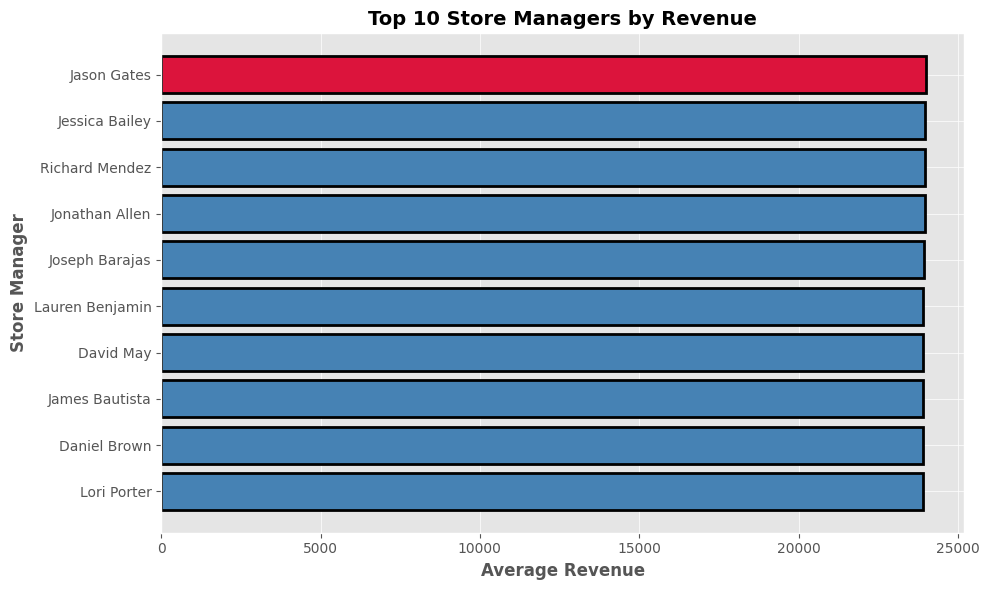

In [29]:
top_manager = manager.head(10)

colors = ["crimson"] + ["steelblue"] * 9

plt.figure(figsize = (10,6))
plt.barh(width = top_manager["Revenue"], y = top_manager["Store_Manager"],color = colors, edgecolor = "k", linewidth = 2)

plt.title("Top 10 Store Managers by Revenue", fontsize=14, fontweight="bold")
plt.xlabel("Average Revenue", fontsize=12, fontweight="bold")
plt.ylabel("Store Manager", fontsize=12, fontweight="bold") 

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

**8. What is the average sales per manager across different regions?**

In [51]:
manager_avg = dfz.groupby([("State"),("Store_Manager")]).agg({"Revenue" : "mean"}).sort_values(by = "Revenue", ascending = False).reset_index()
manager_avg.head(5)

,State,Store_Manager,Revenue
0,Gujarat,Jason Gates,23992.0
1,Karnataka,Jessica Bailey,23976.0
2,Karnataka,Richard Mendez,23960.0
3,Maharashtra,Jonathan Allen,23952.0
4,Uttar Pradesh,Joseph Barajas,23936.0


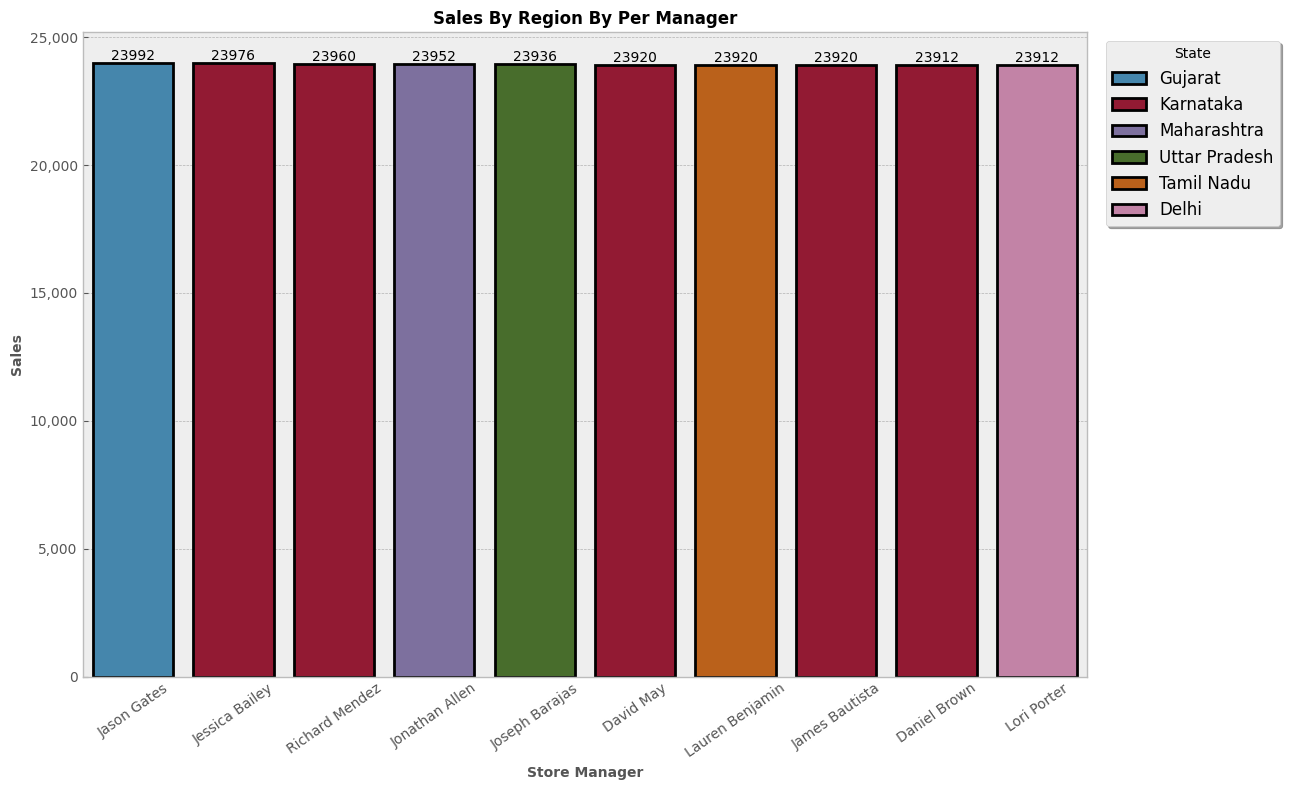

In [50]:
plt.figure(figsize = (13,8))

avg_sale_manager = manager_avg.head(10)

plt.style.use('bmh')
rank = sns.barplot(data = avg_sale_manager, x = "Store_Manager", y = "Revenue",edgecolor = "k", linewidth = 2, hue = "State")
plt.title("Sales By Region By Per Manager", fontsize = 12, fontweight = "bold")
plt.xlabel("Store Manager", fontsize = 10, fontweight = "bold")
plt.ylabel("Sales", fontsize = 10, fontweight = "bold")
plt.xticks(rotation = 35)
plt.legend(title = "State", frameon = True, bbox_to_anchor = (1.01,1), shadow = True, fontsize = 12)

for bar in rank.containers:
    rank.bar_label(bar)

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

plt.savefig("Sales By Region By Per Manager.png",dpi = 300, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

**9. Which product categories (Men, Women, Kids) generate the most revenue?**

In [33]:
categories = dfz.groupby("Category").agg({"Revenue":"sum"}).sort_values(by = "Revenue", ascending = False).reset_index()
categories

,Category,Revenue
0,Kids,21104267
1,Women,20982174
2,Men,20526392


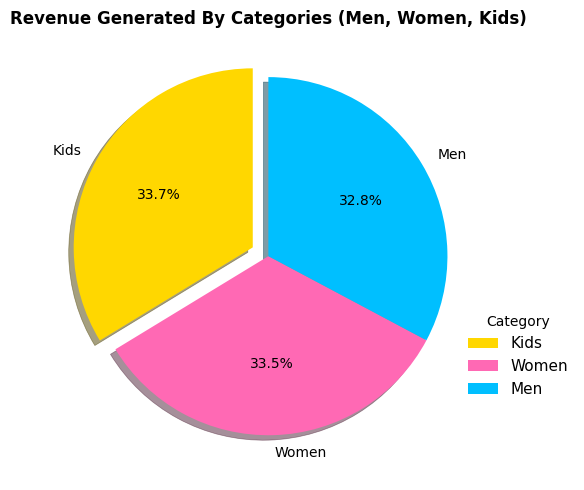

In [34]:
plt.figure(figsize = (9,5))
plt.pie(categories["Revenue"], labels = categories["Category"], autopct = "%1.1f%%", startangle = 90, shadow = True, colors = ["gold","hotpink","deepskyblue"], explode = [0.1,0.0,0.0])
plt.title("Revenue Generated By Categories (Men, Women, Kids)", fontsize = 12, fontweight = "bold")
plt.legend(title = "Category", loc = "upper right", bbox_to_anchor = (1.2,0.4), fontsize = 11, frameon = False)

plt.tight_layout()
plt.show()

**10. Which clothing types (T-shirts, Jeans, Dresses) are top selling?**

In [53]:
types = dfz.query('Clothing_Type in ["T-shirts","Jeans","Dresses"]')
types.head(3)

,Store,Country,State,City,Category,Clothing_Type,Store_Number,Postal_Code,Store_Type,Store_Open_Date,Selling_Area_Size_(sq ft),Store_Manager,Manager_ID,Store_Address,Operating_Hours,Staff_Count,Parking_Availability,Security_Features,Order_ID,Order_Date,Month,Customer_ID,Customer_Name,Product_ID,Price,Quantity,Sales_Profit,Operating_Hours_AM,Operating_Hours_PM,Revenue,Store_Age_years
0,Zudio,India,Karnataka,Jalna,Women,Dresses,30,411084,Owned,2004-06-22,950,Lori Hill,M77,"PSC 4147, Box 1289 APO AA 19737",10 AM - 7 PM,17,Not Available,Alarm,88240,2006-11-24,November,233084,Michele Ochoa,354,1958,5,3916.0,10:00:00,19:00:00,9790,27.520548
3,Zudio,India,West Bengal,Kolkata,Women,Dresses,93,431725,Owned,2011-04-24,1400,Anthony Smith,M40,"473 Wise Summit Lake Carrie, IN 32156",11 AM - 8 PM,13,Not Available,CCTV,46682,2027-03-24,March,106146,Derek Orozco,991,2469,6,5925.6,11:00:00,20:00:00,14814,20.679452
4,Zudio,India,West Bengal,Guwahati,Men,Dresses,51,415370,Owned,2029-05-22,1400,Matthew Romero,M24,"0557 Cameron Trail Apt. 690 South Samuel, TX 3...",10 AM - 7 PM,19,Not Available,"CCTV, Alarm",58242,2008-04-24,April,264070,Victor Arnold,479,1105,6,2652.0,10:00:00,19:00:00,6630,2.589041


In [36]:
types = dfz.query('Clothing_Type in ["T-shirts","Jeans","Dresses"]')

cloth_type = dfz.groupby(types["Clothing_Type"]).agg(Top_selled = ("Revenue", "mean")).sort_values(by = "Top_selled", ascending = False).round(2).reset_index()
cloth_type

,Clothing_Type,Top_selled
0,Dresses,7932.86
1,Jeans,7835.63
2,T-shirts,7748.82


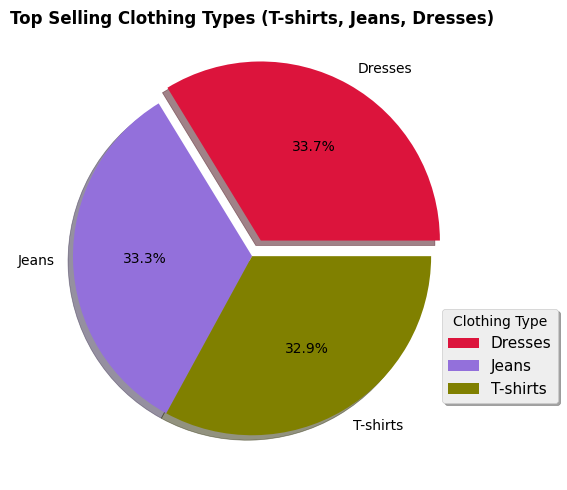

In [54]:
plt.figure(figsize = (9,5))
plt.pie(cloth_type["Top_selled"], labels = cloth_type["Clothing_Type"], autopct = "%1.1f%%",shadow = True, colors = ["crimson","mediumpurple","olive"], explode = [0.1,0.0,0.0])
plt.title("Top Selling Clothing Types (T-shirts, Jeans, Dresses)", fontsize = 12, fontweight = "bold")
plt.legend(title = "Clothing Type", loc = "upper right", bbox_to_anchor = (1.2,0.4), fontsize = 11, frameon = True, shadow = True)

plt.savefig("Top Selling Clothing Types (T-shirts, Jeans, Dresses).png",dpi = 300, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

In [38]:
pd.set_option("display.max_columns",31)

In [39]:
dfz.head()

,Store,Country,State,City,Category,Clothing_Type,Store_Number,Postal_Code,Store_Type,Store_Open_Date,Selling_Area_Size_(sq ft),Store_Manager,Manager_ID,Store_Address,Operating_Hours,Staff_Count,Parking_Availability,Security_Features,Order_ID,Order_Date,Month,Customer_ID,Customer_Name,Product_ID,Price,Quantity,Sales_Profit,Operating_Hours_AM,Operating_Hours_PM,Revenue,Store_Age_years
0,Zudio,India,Karnataka,Jalna,Women,Dresses,30,411084,Owned,2004-06-22,950,Lori Hill,M77,"PSC 4147, Box 1289 APO AA 19737",10 AM - 7 PM,17,Not Available,Alarm,88240,2006-11-24,November,233084,Michele Ochoa,354,1958,5,3916.0,10:00:00,19:00:00,9790,27.520548
1,Zudio,India,Gujarat,Patna,Kids,Skirts,48,404562,Owned,2019-12-20,1200,Deborah Jackson,M89,"0189 Anthony Stravenue Apt. 861 Maryhaven, WV ...",10 AM - 9 PM,6,Not Available,Alarm,78145,2017-06-24,June,926472,Daniel Jimenez,741,2078,1,831.2,10:00:00,21:00:00,2078,12.016438
2,Zudio,India,Uttar Pradesh,Kolkata,Men,Hoodies,97,437773,Rented,2004-09-23,1100,Adam Anderson,M71,Unit 8794 Box 3846 DPO AP 31354,10 AM - 9 PM,18,Not Available,CCTV,33363,2017-08-24,August,853255,Steven Davis,607,1445,2,1156.0,10:00:00,21:00:00,2890,27.265753
3,Zudio,India,West Bengal,Kolkata,Women,Dresses,93,431725,Owned,2011-04-24,1400,Anthony Smith,M40,"473 Wise Summit Lake Carrie, IN 32156",11 AM - 8 PM,13,Not Available,CCTV,46682,2027-03-24,March,106146,Derek Orozco,991,2469,6,5925.6,11:00:00,20:00:00,14814,20.679452
4,Zudio,India,West Bengal,Guwahati,Men,Dresses,51,415370,Owned,2029-05-22,1400,Matthew Romero,M24,"0557 Cameron Trail Apt. 690 South Samuel, TX 3...",10 AM - 7 PM,19,Not Available,"CCTV, Alarm",58242,2008-04-24,April,264070,Victor Arnold,479,1105,6,2652.0,10:00:00,19:00:00,6630,2.589041
